In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, confusion_matrix, fbeta_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb 

In [2]:
X_train = pd.read_csv('./model_csv/X_train_Kickstarter.csv')
X_test = pd.read_csv('./model_csv/X_test_Kickstarter.csv')
y_train = pd.read_csv('./model_csv/y_train_Kickstarter.csv')
y_test = pd.read_csv('./model_csv/y_test_Kickstarter.csv')
y_train = y_train['state']
y_test = y_test['state']

In [3]:
RSEED=42

In [4]:
def plot_conf_matrix(y_true, y_predicted, heatmap_title, color_map='YlGn'):
    cnf_matrix = confusion_matrix(y_true, y_predicted)
    ax = plt.axes()
    sns.heatmap(cnf_matrix, annot = True, fmt = "g", cmap=color_map, ax=ax)
    ax.set_title(heatmap_title)
    plt.show();

In the following sections we will fit 14 different models in total.
Each section has the following steps
1. Initialize model object including parameter definitions
2. Fit on X_train, y_train
3. Predict on X_test
4. Compute classification report
5. Plot confusion matrix

# Dummy Classifier

In [5]:
model_dummy = DummyClassifier(strategy = 'most_frequent')

In [6]:
model_dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [7]:
y_pred_dummy = model_dummy.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22545
           1       0.61      1.00      0.76     35190

    accuracy                           0.61     57735
   macro avg       0.30      0.50      0.38     57735
weighted avg       0.37      0.61      0.46     57735



/Users/niknik/neueFische/git/ds-kickstarter-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niknik/neueFische/git/ds-kickstarter-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niknik/neueFische/git/ds-kickstarter-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

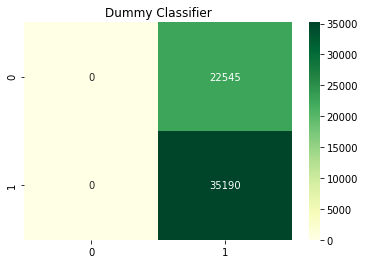

In [9]:
plot_conf_matrix(y_test, y_pred_dummy, 'Dummy Classifier')

# SVM Classifier

In [10]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [11]:
model_svm = SVC(kernel='linear', verbose = 5)

In [12]:
#model_svm.fit(X_train_scaled, y_train)
#dump(model_svm, 'clfSVM.pickle')

In [13]:
model_svm = load('clfSVM.pickle')

In [14]:
#y_pred_svm = svm_clf.predict(X_test_scaled)
#dump(y_pred_svm, 'y_pred_svm.pickle')

In [15]:
y_pred_svm = load('./y_pred_svm.pickle')

In [16]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68     22545
           1       0.80      0.75      0.78     35190

    accuracy                           0.74     57735
   macro avg       0.72      0.73      0.73     57735
weighted avg       0.74      0.74      0.74     57735



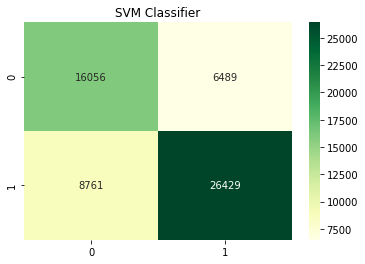

In [17]:
plot_conf_matrix(y_test, y_pred_svm, 'SVM Classifier')

# KNN Classifier

In [18]:
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', n_jobs=-1)

In [19]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [20]:
#y_pred_knn = model_knn.predict(X_test)
#dump(y_pred_knn, './y_pred_knn.pickle')

In [21]:
y_pred_knn = load('./y_pred_knn.pickle')

In [22]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.47      0.51     22545
           1       0.69      0.76      0.72     35190

    accuracy                           0.65     57735
   macro avg       0.62      0.61      0.62     57735
weighted avg       0.64      0.65      0.64     57735



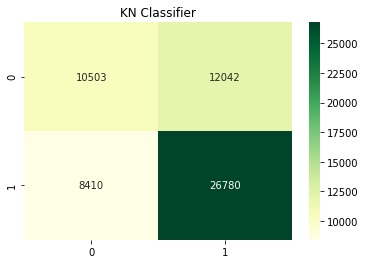

In [23]:
plot_conf_matrix(y_test, y_pred_knn, 'KNN Classifier')

# SGDClassifier

In [24]:
model_sgd = SGDClassifier(loss='hinge', max_iter=1000, alpha=0.0001, random_state=RSEED)

In [25]:
model_sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [26]:
y_pred_sgd = model_sgd.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     22545
           1       0.68      0.68      0.68     35190

    accuracy                           0.61     57735
   macro avg       0.59      0.59      0.59     57735
weighted avg       0.61      0.61      0.61     57735



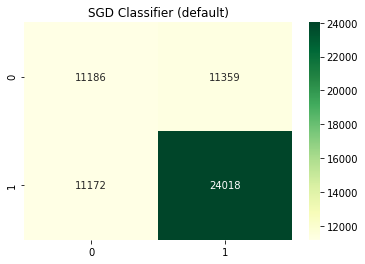

In [28]:
plot_conf_matrix(y_test, y_pred_sgd, 'SGD Classifier (default)')

# SGD Classifier - GridSearchCV

In [29]:
model_sgd_gs = SGDClassifier(max_iter=1000, random_state=RSEED)

In [30]:
params_sgd_gs = {"loss" : ["hinge", "log"],
              "alpha" : [0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "elasticnet"]
             }

In [31]:
sgd_gs = GridSearchCV(model_sgd_gs, params_sgd_gs, scoring='accuracy', cv=5, verbose=5, n_jobs=-1)

In [32]:
sgd_gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log'],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy', verbose=5)

In [33]:
# Best score
print('Best score:', round(sgd_gs.best_score_, 3))
# Best parameters
print('Best parameters:', sgd_gs.best_params_)

Best score: 0.629
Best parameters: {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}


In [34]:
y_pred_sgd_gs = sgd_gs.best_estimator_.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_sgd_gs))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     22545
           1       0.68      0.69      0.68     35190

    accuracy                           0.61     57735
   macro avg       0.59      0.59      0.59     57735
weighted avg       0.61      0.61      0.61     57735



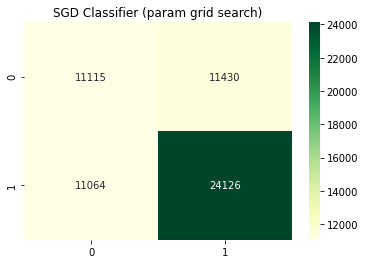

In [36]:
plot_conf_matrix(y_test, y_pred_sgd_gs, 'SGD Classifier (param grid search)')

# RandomForest

In [37]:
model_rf = RandomForestClassifier(n_estimators=120, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [38]:
model_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   35.4s finished


RandomForestClassifier(max_features='sqrt', n_estimators=120, n_jobs=-1,
                       random_state=42, verbose=1)

In [39]:
y_pred_rf = model_rf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    1.3s finished


In [40]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     22545
           1       0.83      0.86      0.84     35190

    accuracy                           0.80     57735
   macro avg       0.79      0.79      0.79     57735
weighted avg       0.80      0.80      0.80     57735



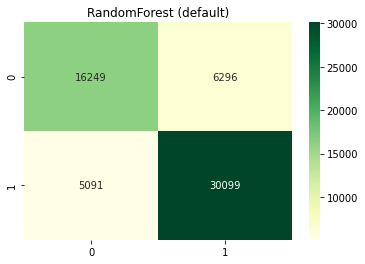

In [41]:
plot_conf_matrix(y_test, y_pred_rf, 'RandomForest (default)')

In [110]:
type(model_rf.feature_importances_)

numpy.ndarray

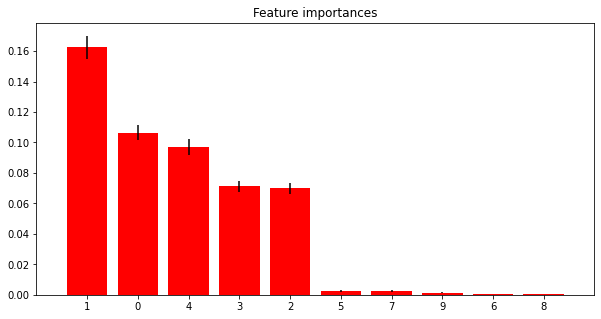

In [116]:
num_feat = 10
importances = model_rf.feature_importances_[:num_feat]
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],axis=0)
std = std[:num_feat]
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(num_feat), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(num_feat), indices)
plt.xlim([-1, num_feat])
plt.show()

# ExtraTrees

In [42]:
model_extra = ExtraTreesClassifier(n_estimators=100, random_state=RSEED)

In [43]:
model_extra.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [44]:
y_pred_extra = model_extra.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_extra))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     22545
           1       0.82      0.83      0.83     35190

    accuracy                           0.79     57735
   macro avg       0.78      0.78      0.78     57735
weighted avg       0.79      0.79      0.79     57735



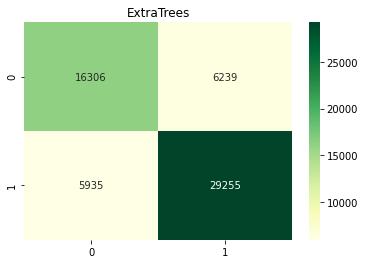

In [46]:
plot_conf_matrix(y_test, y_pred_extra, 'ExtraTrees')

# QuadraticDiscriminantAnalysis

In [47]:
model_quad = QuadraticDiscriminantAnalysis()

In [48]:
model_quad.fit(X_train, y_train)

/Users/niknik/neueFische/git/ds-kickstarter-project/.venv/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [49]:
y_pred_quad = model_quad.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_quad))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50     22545
           1       0.69      0.82      0.75     35190

    accuracy                           0.67     57735
   macro avg       0.64      0.62      0.62     57735
weighted avg       0.65      0.67      0.65     57735



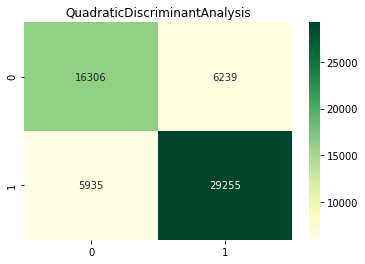

In [51]:
plot_conf_matrix(y_test, y_pred_extra, 'QuadraticDiscriminantAnalysis')

# AdaBoost

In [52]:
model_ada = AdaBoostClassifier()

In [53]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [54]:
y_pred_ada = model_ada.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65     22545
           1       0.77      0.82      0.79     35190

    accuracy                           0.74     57735
   macro avg       0.73      0.72      0.72     57735
weighted avg       0.74      0.74      0.74     57735



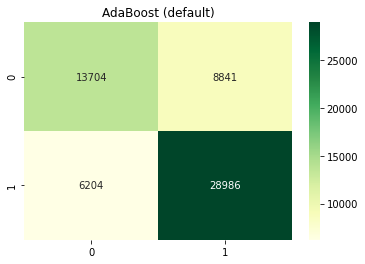

In [56]:
plot_conf_matrix(y_test, y_pred_ada, 'AdaBoost (default)')

# AdaBoost - GridSearchCV

In [62]:
model_ada_gs = AdaBoostClassifier(random_state = RSEED)

In [63]:
params_ada_gs = {'n_estimators':[ 100, 400 , 1080],                
              'learning_rate':[0.8, 0.85, 0.9],               
             } 

In [64]:
ada_gs = GridSearchCV(model_ada_gs, param_grid=params_ada_gs, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [65]:
#ada_gs.fit(X_train, y_train)
#dump(ada_gs, './ada_gs.pickle')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


['./ada_gs.pickle']

In [ ]:
ada_gs = load('./ada_gs.pickle')

In [66]:
# Best score
print('Best score:', round(ada_gs.best_score_, 3))
# Best parameters
print('Best parameters:', ada_gs.best_params_)

Best score: 0.773
Best parameters: {'learning_rate': 0.9, 'n_estimators': 1080}


In [68]:
y_pred_ada_gs = ada_gs.best_estimator_.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred_ada_gs))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     22545
           1       0.82      0.81      0.81     35190

    accuracy                           0.77     57735
   macro avg       0.76      0.76      0.76     57735
weighted avg       0.77      0.77      0.77     57735



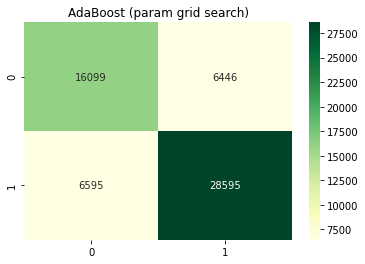

In [70]:
plot_conf_matrix(y_test, y_pred_ada_gs, 'AdaBoost (param grid search)')

# LightGBM

In [71]:
model_lgb = lgb.LGBMClassifier()

In [72]:
model_lgb.fit(X_train, y_train)

LGBMClassifier()

In [73]:
y_pred_lgb = model_lgb.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71     22545
           1       0.82      0.82      0.82     35190

    accuracy                           0.78     57735
   macro avg       0.77      0.77      0.77     57735
weighted avg       0.78      0.78      0.78     57735



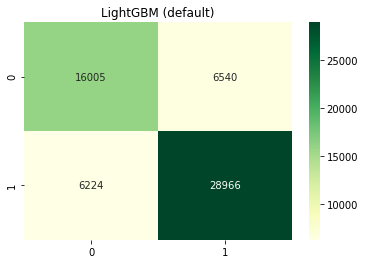

In [75]:
plot_conf_matrix(y_test, y_pred_lgb, 'LightGBM (default)')

# LightGBM - GridSearchCV

In [76]:
model_lgb_gs = lgb.LGBMClassifier(random_state=RSEED)

In [77]:
params_lgb_gs = {
    'n_estimators': [100, 400, 700],   # default 100
    #'colsample_bytree': [0.7, 0.8, 1.],   # default 1.
    'max_depth': [-1, 60, 120],          # default -1
    #'num_leaves': [31, 50, 100],      # default 31
    #'reg_alpha': [0., 1.1, 1.2],     # default 0.
    #'reg_lambda': [0., 1.1, 1.2],     # default 0.
    #'min_split_gain': [0.3, 0.4],     # default 0.
    #'subsample': [0.7, 0.8, 0.9],     # default 1.
    #'subsample_freq': [20]     # default 0
    }


In [78]:
lgb_gs = GridSearchCV(model_lgb_gs, param_grid=params_lgb_gs, scoring='accuracy', cv=5, verbose=5, n_jobs=-1)

In [82]:
#lgb_gs.fit(X_train, y_train)
#dump(lgb_gs, "lgb_gs.pickle")

Fitting 5 folds for each of 9 candidates, totalling 45 fits


['lgb_gs.pickle']

In [83]:
lgb_gs = load('./lgb_gs.pickle')

In [84]:
# Best score
print('Best score:', round(lgb_gs.best_score_, 3))
# Best parameters
print('Best parameters:', lgb_gs.best_params_)

Best score: 0.785
Best parameters: {'max_depth': -1, 'n_estimators': 700}


In [85]:
y_pred_lgb_gs = lgb_gs.best_estimator_.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred_lgb_gs))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     22545
           1       0.82      0.83      0.83     35190

    accuracy                           0.79     57735
   macro avg       0.78      0.78      0.78     57735
weighted avg       0.79      0.79      0.79     57735



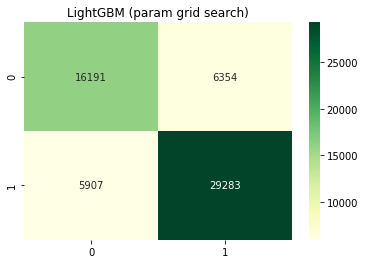

In [87]:
plot_conf_matrix(y_test, y_pred_lgb_gs, 'LightGBM (param grid search)')

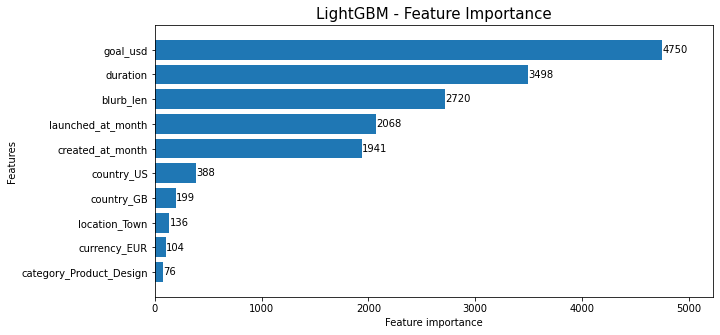

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
lgb.plot_importance(lgb_gs.best_estimator_, max_num_features=10, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.savefig('feature_importance_top50_lightgbm.png')

# XGBoost

In [89]:
model_xgb = xgb.XGBClassifier()

In [90]:
model_xgb.fit(X_train, y_train)

/Users/niknik/neueFische/git/ds-kickstarter-project/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_pred_xgb = model_xgb.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71     22545
           1       0.81      0.83      0.82     35190

    accuracy                           0.78     57735
   macro avg       0.77      0.76      0.76     57735
weighted avg       0.78      0.78      0.78     57735



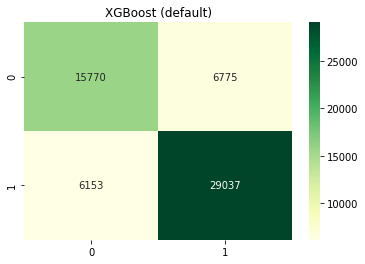

In [93]:
plot_conf_matrix(y_test, y_pred_xgb, 'XGBoost (default)')

# Naive Bayes

In [94]:
model_nb = BernoulliNB()

In [95]:
model_nb.fit(X_train, y_train)

BernoulliNB()

In [96]:
y_pred_nb = model_nb.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     22545
           1       0.78      0.78      0.78     35190

    accuracy                           0.73     57735
   macro avg       0.72      0.72      0.72     57735
weighted avg       0.73      0.73      0.73     57735



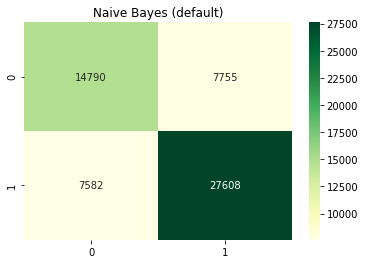

In [98]:
plot_conf_matrix(y_test, y_pred_nb, 'Naive Bayes (default)')